<IPython.core.display.Javascript object>


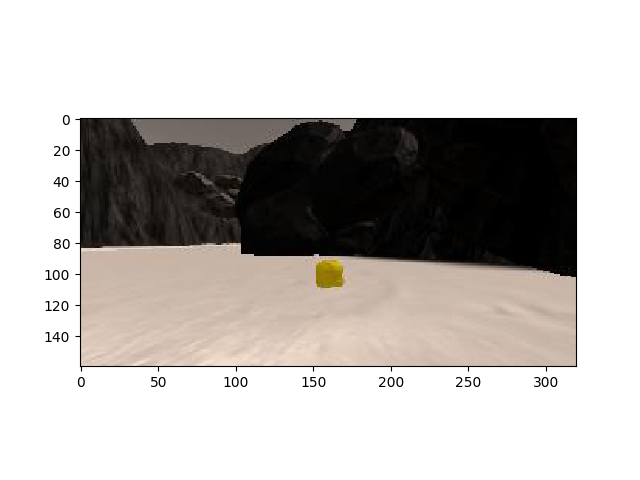

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib notebook

image = mpimg.imread('../calibration_images/example_rock1.jpg')
plt.imshow(image)
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib notebook

lower_yellow = np.uint8([[[0,106,133]]])
upper_yellow = np.uint8([[[56,170,206]]])
hsv_lower_yellow = cv2.cvtColor(lower_yellow,cv2.COLOR_BGR2HSV)
hsv_upper_yellow = cv2.cvtColor(upper_yellow,cv2.COLOR_BGR2HSV)
print ("Lower yellow threshold in HSV")
print (hsv_lower_yellow)
print ("Upper yellow threshold in HSV")
print (hsv_upper_yellow)


Lower yellow threshold in HSV
[[[ 24 255 133]]]
Upper yellow threshold in HSV
[[[ 23 186 206]]]


In [13]:
import cv2
import numpy as np

frame = cv2.imread("../calibration_images/example_rock1.jpg")

while(1):
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_yellow = np.array([4,100,100])
    upper_yellow = np.array([33,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


<IPython.core.display.Javascript object>


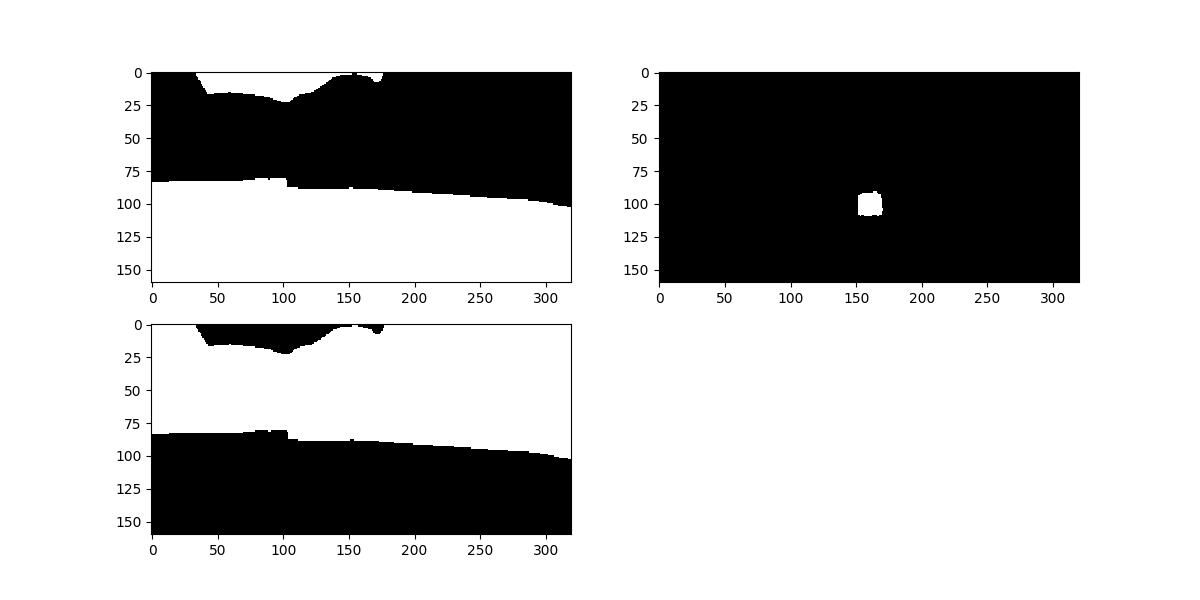

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import scipy.misc
%matplotlib notebook

img = cv2.imread("../calibration_images/example_rock1.jpg")
otsu_img = cv2.imread("../calibration_images/example_rock1.jpg",0)

#GROUND
blur = cv2.GaussianBlur(otsu_img,(5,5),0)
ret2,threshed_ground = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#OBSTACLES
blur = cv2.GaussianBlur(otsu_img,(5,5),0)
ret2,threshed_obstacle = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#GOLD ROCKS
def sample(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([4,100,100])
    upper_yellow = np.array([33,255,255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    return mask

threshed_sample = sample(img)

fig = plt.figure(figsize=(12,6))
plt.subplot(221)
plt.imshow(threshed_ground, cmap='gray')
plt.subplot(222)
plt.imshow(threshed_sample, 'gray')
plt.subplot(223)
plt.imshow(threshed_obstacle, cmap='gray')
pls.subplot(224)


#scipy.misc.imsave('../output/warped_threshed.jpg', threshed*255)

<IPython.core.display.Javascript object>


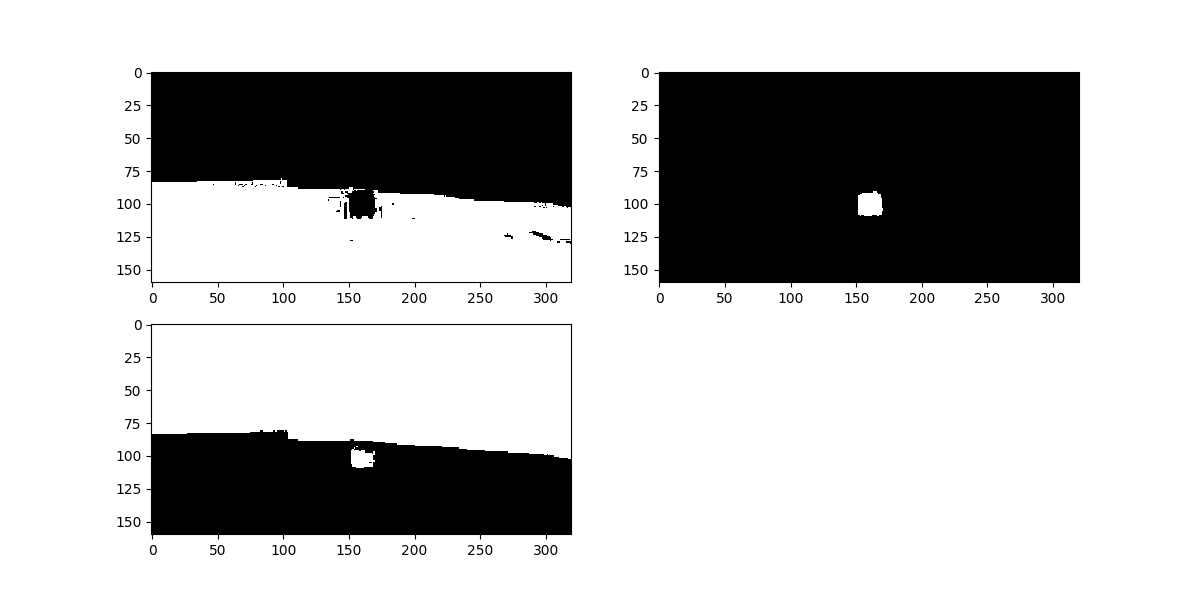

In [2]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import scipy.misc
%matplotlib notebook

img = cv2.imread("../calibration_images/example_rock1.jpg")

def ground(img, rgb_thresh=(160, 160, 160)):
    color_above = np.zeros_like(img[:,:,0])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    color_above[above_thresh] = 1
    return color_above

threshed_ground = ground(img)

def obstacle(img, rgb_thresh=(160,160,160)):
    color_below = np.zeros_like(img[:,:,0])
    below_thresh = (img[:,:,0] < rgb_thresh[0]) \
                & (img[:,:,1] < rgb_thresh[1]) \
                & (img[:,:,2] < rgb_thresh[2])
    color_below[below_thresh] = 1
    return color_below

threshed_obstacle = obstacle(img)

def sample(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([4,100,100])
    upper_yellow = np.array([33,255,255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    # Bitwise-AND mask and original image
    # res = cv2.bitwise_and(frame,frame, mask= mask)
    return mask

threshed_sample = sample(img)

fig = plt.figure(figsize=(12,6))
plt.subplot(221)
plt.imshow(threshed_ground, cmap='gray')
plt.subplot(222)
plt.imshow(threshed_sample, 'gray')
plt.subplot(223)
plt.imshow(threshed_obstacle, cmap='gray')

#scipy.misc.imsave('../output/warped_threshed.jpg', threshed*255)

<IPython.core.display.Javascript object>


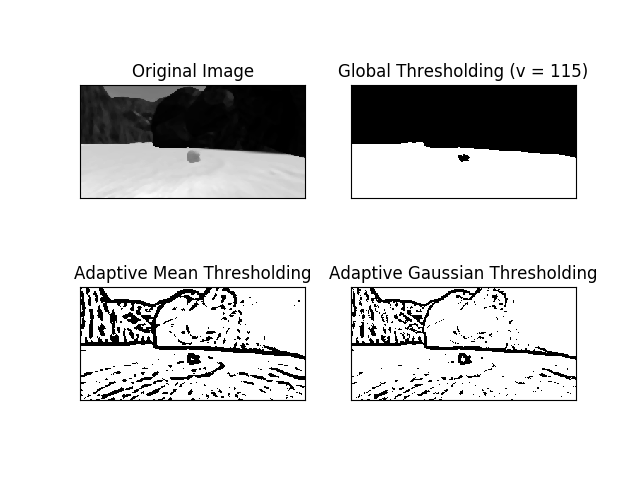

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("../calibration_images/example_rock1.jpg",0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,115,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 115)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


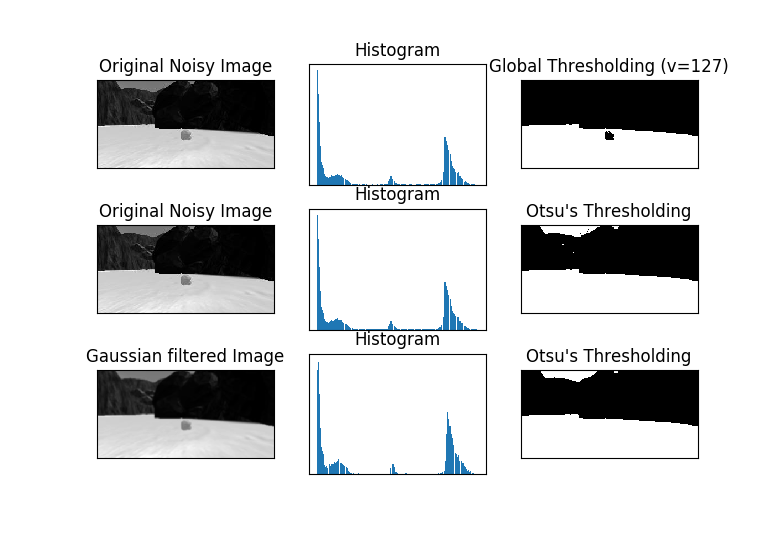

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread("../calibration_images/example_rock1.jpg",0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


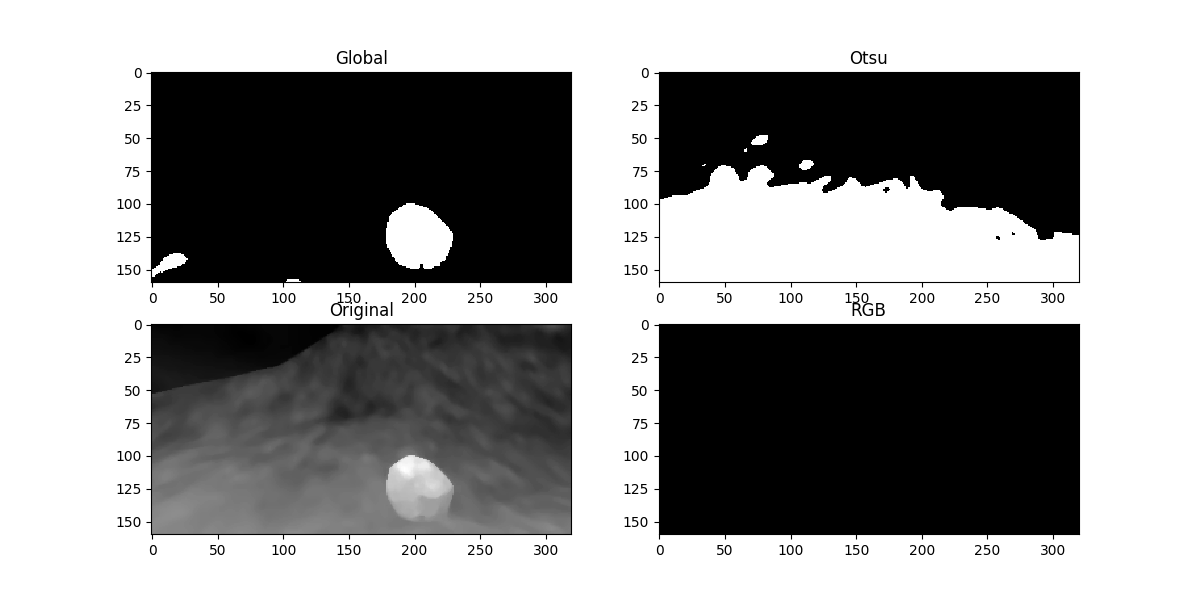

In [30]:
#THRESHOLDING METHODS AND TESTING

import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import scipy.misc
%matplotlib notebook

path = '../rover-data/IMG/*'
img_list = glob.glob(path)
# Grab a random image and display it
idx = np.random.randint(0, len(img_list)-1)
img = cv2.imread(img_list[idx],0)

#img = cv2.imread("../calibration_images/example_rock1.jpg",0)
img = cv2.medianBlur(img,5)

#Global thresholding
ret,th1 = cv2.threshold(img,115,255,cv2.THRESH_BINARY)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

frame = mpimg.imread(img_list[idx])
#frame = cv2.imread("../calibration_images/example_rock1.jpg")

def ground(frame, rgb_thresh=(160, 160, 160)):
    color_above = np.zeros_like(frame[:,:,0])
    above_thresh = (frame[:,:,0] > rgb_thresh[0]) \
                & (frame[:,:,1] > rgb_thresh[1]) \
                & (frame[:,:,2] > rgb_thresh[2])
    color_above[above_thresh] = 1
    return color_above

threshed_ground = ground(frame)

fig = plt.figure(figsize=(12,6))
plt.subplot(221)
plt.title("Global")
plt.imshow(th1, 'gray')
plt.subplot(222)
plt.title("Otsu")
plt.imshow(th2, 'gray')
plt.subplot(223)
plt.title("Original")
plt.imshow(img, 'gray')
plt.subplot(224)
plt.title("RGB")
plt.imshow(threshed_ground, 'gray')

In [17]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

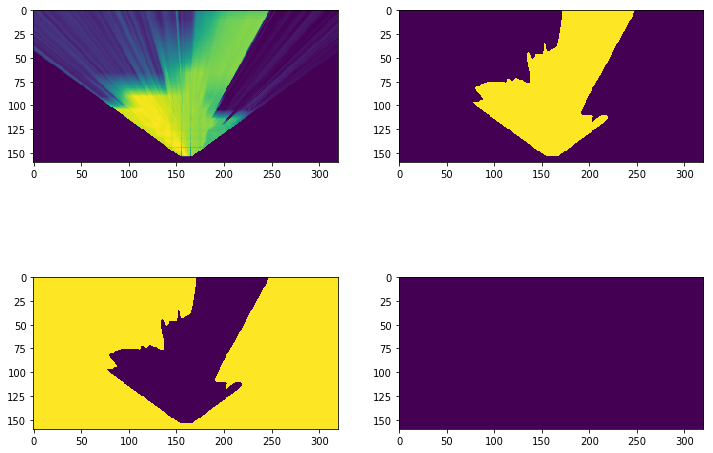

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob
#%matplotlib notebook
#%matplotlib qt
%matplotlib inline

path = '../rover-data/IMG/*'
save_path = '../rover-data/SAVE/*'
img_list = glob.glob(path)
img_save = glob.glob(save_path)
# Grab a random image and display it
idx = np.random.randint(0, len(img_list)-1)
image = mpimg.imread(img_list[idx])
#plt.imshow(image)

example_grid = '../calibration_images/example_grid1.jpg'
example_rock = '../calibration_images/example_rock1.jpg'

grid_img_imread = mpimg.imread(example_grid)
grid_img_cv2 = cv2.imread(example_grid)
grid_otsu_img = cv2.imread(example_grid,0)

rock_img_imread = mpimg.imread(example_rock)
rock_img_cv2 = cv2.imread(example_rock) 
rock_otsu_img = cv2.imread(example_grid,0)


#WARPED PERSPECIVE TRANSFORM
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    
    return warped

dst_size = 5 
bottom_offset = 6
source = np.float32([[15, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped = perspect_transform(grid_otsu_img, source, destination)

#scipy.misc.imsave('../output/warped_example.jpg', warped)

#GROUND
def ground_thresh(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret2,threshed_ground = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return threshed_ground

warped_threshed_ground = ground_thresh(warped)

#OBSTACLES
def obstacle_thresh(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret2,threshed_obstacle = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return threshed_obstacle

warped_threshed_obstacle = obstacle_thresh(warped)

#GOLD ROCKS
warped_sample = perspect_transform(grid_img_cv2, source, destination)
def sample_thresh(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([4,100,100])
    upper_yellow = np.array([33,255,255])
    threshed_sample = cv2.inRange(hsv, lower_yellow, upper_yellow)
    return threshed_sample

warped_threshed_sample = sample_thresh(warped_sample)

fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(warped)
plt.subplot(222)
plt.imshow(warped_threshed_ground)
plt.subplot(223)
plt.imshow(warped_threshed_obstacle)
plt.subplot(224)
plt.imshow(warped_threshed_sample)

#scipy.misc.imsave('../output/warped_threshed.jpg', threshed*255)

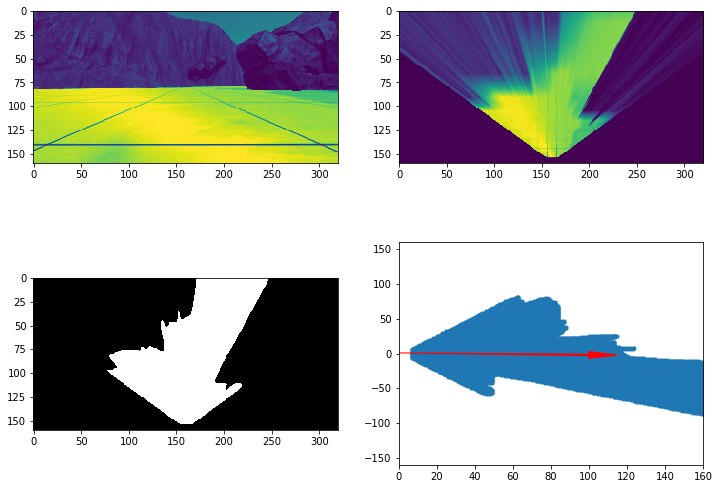

In [5]:
# Define a function to convert from image coords to rover coords
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel

# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

# Define a function to map rover space pixels to world space
def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated

def translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale): 
    # Apply a scaling and a translation
    xpix_translated = (xpix_rot / scale) + xpos
    ypix_translated = (ypix_rot / scale) + ypos
    # Return the result  
    return xpix_translated, ypix_translated


# Define a function to apply rotation and translation (and clipping)
# Once you define the two functions above this function should work
def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    # Apply rotation
    xpix_rot, ypix_rot = rotate_pix(xpix, ypix, yaw)
    # Apply translation
    xpix_tran, ypix_tran = translate_pix(xpix_rot, ypix_rot, xpos, ypos, scale)
    # Perform rotation, translation and clipping all at once
    x_pix_world = np.clip(np.int_(xpix_tran), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(ypix_tran), 0, world_size - 1)
    # Return the result
    return x_pix_world, y_pix_world

# Grab another random image
#idx = np.random.randint(0, len(img_list)-1)
#image = mpimg.imread(img_list[idx])
#warped = perspect_transform(image, source, destination)
warped = perspect_transform(grid_otsu_img, source, destination)
#threshed = color_thresh(warped)
warped_threshed_ground = ground_thresh(warped)

# Calculate pixel values in rover-centric coords and distance/angle to all pixels
xpix, ypix = rover_coords(warped_threshed_ground)
dist, angles = to_polar_coords(xpix, ypix)
mean_dir = np.mean(angles)

# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(grid_otsu_img)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(warped_threshed_ground, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(mean_dir)
y_arrow = arrow_length * np.sin(mean_dir)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)